# Download Required Libararies

**Note that i have run this code on kaggle cloud envoirenemnt. It should work fine in the same envoirenemt as long as below dependencies are installed**

In [8]:
# !pip install requests wget arxiv
# !pip install pymupdf
# !pip install langchain sentence_transformers chromadb unstructured -q
# !pip install pypdf
# !pip install docx2txt
# !pip install python-dotenv
# !pip install "unstructured[pdf]"
# !pip install "unstructured[docx]"
# !pip install accelerate
# !pip install chromadb -q
# !pip install bertopic
# !pip install -U kaleido
# !pip install psutil requests
# !pip install plotly>=5.0.0
# !pip install pandas==1.2.5

# **TASK**

In this assignment you are asked to build a seman4c search engine, able to search a
collec4on of PDF documents on a paragraph-by-paragraph basis.
To achieve this goal, you should use Python, the SentenceTransformers library
(hAps://www.sbert.net/) and any other generally accessible Python libraries. Your code
should allow to:
- Download k PDFs from hAps://arxiv.org following a user- specified search query and
chunk them into individual paragraphs
- Encode/embed each paragraph using SentenceTransformers and store these
encodings
- Search for the paragraphs most relevant to a user-specified query and show the
results
- For bonus points, perform topic modelling on the paragraphs and present the results

Please send us a brief report in the shape of a Jupyter notebook, including all your code
intertwined with textual descrip4ons and any relevant plots, outlining and jus4fying in a
compact but accurate way the approach you have taken and the analysis you have
performed.
Please reference any online code that you may have based your analysis on.

# Download papers from arxiv

In [64]:
import arxiv
import os
import warnings
warnings.filterwarnings("ignore")

ids = []  # it will store the ids of papers
urls =[]  # it will store the URLs of papers
titles = [] ## it will store the Titles of papers

# **To download papers from arxiv.org we can use [arxiv](http://https://pypi.org/project/arxiv/) python api**


# arXiv is a project by the Cornell University Library that provides open access to 1,000,000+ articles in Physics, Mathematics, Computer Science, Quantitative Biology, Quantitative Finance, and Statistics.


# Below I have specified 6 query terms, related to which i want to search papers. For each query term, I will download 5 PDFs. That means in total i should have 30 unique pdfs as long as 2 or more search terms do not return the same paper.

# The reason i have specified 6 query terms is that lateron i will perform topic modelling and my topic modelling approach should be able to distinguise these different papers

In [65]:
query_terms = ["large language models", "quantitative biology", "quantum computing", "health care", "electrical engineering", "economics"]
k = 5

# Below code will loop over each query topic and search arxiv for the related papers. it will then fetch, ID, title and URL for each paper that It indentified.

In [66]:
import time
for query in query_terms:
    
    search = arxiv.Search(
      query = query,  # specify the term, related to which you want to download the papers
      max_results = k,   # specify the number of papers you want to download
      sort_by = arxiv.SortCriterion.SubmittedDate
    )
    print(f'For "{query}" below papers are found...')
    for result in search.results():
        print("URL:",result)
        ids.append(result.pdf_url.split("/")[-1])
        urls.append(result.pdf_url)
        titles.append(result.title)

For "large language models" below papers are found...
URL: http://arxiv.org/abs/2309.12314v1
URL: http://arxiv.org/abs/2309.12312v1
URL: http://arxiv.org/abs/2309.12311v1
URL: http://arxiv.org/abs/2309.12310v1
URL: http://arxiv.org/abs/2309.12309v1
For "quantitative biology" below papers are found...
URL: http://arxiv.org/abs/2309.12277v1
URL: http://arxiv.org/abs/2309.12244v1
URL: http://arxiv.org/abs/2309.12184v1
URL: http://arxiv.org/abs/2309.12183v1
URL: http://arxiv.org/abs/2309.12169v1
For "quantum computing" below papers are found...
URL: http://arxiv.org/abs/2309.12315v1
URL: http://arxiv.org/abs/2309.12314v1
URL: http://arxiv.org/abs/2309.12313v1
URL: http://arxiv.org/abs/2309.12312v1
URL: http://arxiv.org/abs/2309.12311v1
For "health care" below papers are found...
URL: http://arxiv.org/abs/2309.12282v1
URL: http://arxiv.org/abs/2309.12236v1
URL: http://arxiv.org/abs/2309.12224v1
URL: http://arxiv.org/abs/2309.12210v1
URL: http://arxiv.org/abs/2309.12142v1
For "electrical eng

# Below code loop over each paper id, and download it from arxiv. Downloaded papers are being stored in local directoy named "papers2"

In [68]:
directory_path = "papers2"
download_counter = 0
for idd in ids:
    child_dir = directory_path+f"/{idd}"
    try:
        os.makedirs(child_dir)
        paper = next(arxiv.Search(id_list=[idd]).results())
        print(f"Dowloading : {idd}", end=" ")
        paper.download_pdf(dirpath=child_dir) #, filename=idd)
        download_counter+=1
    except:
        print(child_dir+ " has already been download in earlier search")
    print("--> Done!")
print("Total "+str(download_counter)+" papers have been downloaded right now...!")

Dowloading : 2309.12314v1 --> Done!
Dowloading : 2309.12312v1 --> Done!
Dowloading : 2309.12311v1 --> Done!
Dowloading : 2309.12310v1 --> Done!
Dowloading : 2309.12309v1 --> Done!
Dowloading : 2309.12277v1 --> Done!
Dowloading : 2309.12244v1 --> Done!
Dowloading : 2309.12184v1 --> Done!
Dowloading : 2309.12183v1 --> Done!
Dowloading : 2309.12169v1 --> Done!
Dowloading : 2309.12315v1 --> Done!
papers4/2309.12314v1 has already been download in earlier search
--> Done!
Dowloading : 2309.12313v1 --> Done!
papers4/2309.12312v1 has already been download in earlier search
--> Done!
papers4/2309.12311v1 has already been download in earlier search
--> Done!
Dowloading : 2309.12282v1 --> Done!
Dowloading : 2309.12236v1 --> Done!
Dowloading : 2309.12224v1 --> Done!
Dowloading : 2309.12210v1 --> Done!
Dowloading : 2309.12142v1 --> Done!
papers4/2309.12282v1 has already been download in earlier search
--> Done!
Dowloading : 2309.12276v1 --> Done!
Dowloading : 2309.12243v1 --> Done!
Dowloading : 230

# Note that i should have got 30 papers, but have actually received 26. This is because some of the papers found to be common among different query terms and we have avoided downloading the same paper again. Same message you can see in above printed traceback.

# Load PDFs from local drive and partition them into samller chunks

# Below i am reading all the papers stored in papers2 directory

In [19]:
import os
directory_path = "papers2"
ids = os.listdir(directory_path)
print("Total Papers:", len(ids))

Total Papers: 26


# Below I am using [langchain Directory Loader](https://js.langchain.com/docs/api/document_loaders_fs_directory/classes/DirectoryLoader) to read PDFs from directory.

In [20]:
from tqdm import tqdm
from langchain.document_loaders import DirectoryLoader


def load_docs(directory):
    """
    function uses langchain DirectoryLoader to load pdf file from directory
    params:
        directory: path of the directory from which to load the file
    
    """
    loader = DirectoryLoader(directory)
    document = loader.load()        
    return document[0]


documents=[]
for idd in tqdm(ids):
    """
    Loop over all paper_ids. prepare the right path for each dowloaded file and send the path to load_docs function defined above.
    """
    try:
        child_dir = directory_path+f"/{idd}"
        doc = load_docs(child_dir)
        documents.append(doc)
    except:
        print("Error in loading :", child_dir)
    

100%|██████████| 26/26 [03:24<00:00,  7.88s/it]


# Below code is chuking earlier read pdfs into samller chunks. Each chunk is of 2000 charectors. Because I do not want to lose the context while chunking,  I am also keeping an overlapping of 100 charectors from one chunk to its immediate next chunk. Again i am utilizing [langchain RecursiveCharacterTextSplitter](https://python.langchain.com/docs/modules/data_connection/document_transformers/text_splitters/recursive_text_splitter) for this task

In [21]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def split_docs(documents,chunk_size=2000,chunk_overlap=100):
    """
    function is responsible for splitting long length text into smaller chunks of 2000 charectors each.
    params:
        documents: a list of documents in which each document contain one of the pdf content dowloaded earlier
        chunk_size: size of the chunk in which we want to split the pdf content
        chunk_overlap: chunk_overlap defines how much overlap each chunk will have with immeidate next chunk
    """
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    docs = text_splitter.split_documents(documents)
    return docs

docs = split_docs(documents)
print("Total Chunks Created : ", len(docs))


Total Chunks Created :  1012


# **Loading sentece transformer**

# I will be using langchain [SentenceTransformerEmbeddings](https://python.langchain.com/docs/integrations/text_embedding/sentence_transformers). This class allow us to use any hugging face embedding model.

In [22]:
from langchain.embeddings import SentenceTransformerEmbeddings

#model = "BAAI/bge-large-en-v1.5"  # if you have high computation power use this embedding model, and comment out below one. 
                                # This is the best open source embedding model at current time.

model = "all-MiniLM-L6-v2"  

embedding_model = SentenceTransformerEmbeddings(model_name=model)

# **Creating Vector Store**

# Below i am creating a vector store, where i will keep each chunk along with its embedding obtained using sentence transformer. Each chunk will also have the filename infomartion saved as metadata. this metadata information can later on be used for better quality retrieval or for providing more context about retrieved chunk.

# I am using Chroma DB vector store, which is vector databse. In Chroma DB, a collection named "my_collection1" will be created if it does not already exists. if the collection already exists the same collection along with its DB will be used.

# persist_directory is the path of directory where calculated vectors will be stored. Note that i am storing vectors in local drive

In [23]:
from langchain.vectorstores import Chroma
import chromadb

# Create a Chroma DB client.
client = chromadb.Client()

# Set the persist directory and collection name.
persist_directory = "chroma_db"  # it is the location where vectorstore will be saved
collection_name = "my_collection1"  # it gives a unique name to each vectorstore.

# Try to get the existing collection from the Chroma DB.
try:
    # If the collection exists, load it.
    client.get_collection(collection_name)
    db = Chroma(
        client=client,
        embedding_function=embedding_model,
        persist_directory=persist_directory,
        collection_name=collection_name,
        collection_metadata={"hnsw:space": "cosine"},
    )
    print("I have found existing collection and loaded it...")

# If the collection does not exist, create a new one and populate it with the documents in the `docs` list.
except:
    print("Could not find existing collection. Going to create new one and populate it...")
    db = Chroma.from_documents(
        documents=docs,
        embedding=embedding_model,
        client=client,
        persist_directory=persist_directory,
        collection_name=collection_name,
        collection_metadata={"hnsw:space": "cosine"},
    )

# Persist the collection to the local drive.
db.persist()


Could not find existing collection. Going to create new one and populate it...


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

# **Perform Retrieval**

# Get all documents stored in chroma DB.

In [24]:
# db.get() will return all the docs from vector store
all_docs = db.get(include=['embeddings', 'metadatas', 'documents'])
print("Total documents in the collection = ",len(all_docs['ids']))
print("Following are the information that we get from vectorstore= ",list(all_docs.keys()))

Total documents in the collection =  1012
Following are the information that we get from vectorstore=  ['ids', 'embeddings', 'metadatas', 'documents']


# **Retrieve documents based on given query/ embedding similarity**

# Before performing retrieval, below i have defined a helper function to print the content clearly

In [25]:
# helper function to print the content clearly by increasing fontsize using HTML
import warnings
import re
from IPython.core.display import display, HTML
warnings.filterwarnings('ignore')
def print_large(text, font_size=18):
    """
    function print the content clearly by increasing fontsize using HTML and removing \n with <br/>
    params:
        text: text that is needed to be printed
        font_size: font_size that is needed to be set for text. Default is 18
    """
    text = re.sub('\n','<br/>',text)  # replace \n with <br/>
    html_text = f"<p style='font-size:{font_size}px'>{text}</p>"   # create a html paragraph wrapper around text 
    display(HTML(html_text))

# Below i have seacrhed a query "machine learning in health care?", Lets see what chunk do we receive. We will be selecting only the most relevent chunk. Note that you can further increase the value of k to get more chunks.

# **Retrieval operation in this task use cosine distance measure to find most relevent chunk.
# **cosine distance = 1 - cosine similariy
# **cosine distance ranges between 0-2. 0 being the exact similarity and 2 shows the exact disimilarity

In [40]:
import warnings
warnings.filterwarnings("ignore")

query = "machine learning in health care?"
k=1
matching_docs = db.similarity_search_with_score(query,k=k)  # db.similarity_search_with_score returns the relevent chunks along with the similarity score. The most relevent chunk remains at the top. k is the number of chunks you want to retrieve from database


# matching_docs contains a list of relevet documents retrieved above. 
# It has page_content which is actual text of the chuk
# it has metadata which has tells to which file this chunk belong to

vector_list = []
score_list = []
for vector, score in matching_docs:
    print_large("Result...!")
    print_large(vector.page_content)
    print_large("metadata")
    print(vector.metadata)
    print_large("cosine distance = "+str(score))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'source': 'papers3/2309.12142v1/2309.12142v1.Characterizing_Pulmonary_Fibrosis_Patterns_in_Post_COVID_19_Patients_through_Machine_Learning_Algorithms.pdf'}


# The above chunk is coming from "Characterizing_Pulmonary_Fibrosis_Patterns_in_Post_COVID_19_Patients_through_Machine_Learning_Algorithms.pdf" file and talks about using machine learning in health care. Thus, we have actaully got a revent chunk for our query.

# **Retrieve docuemts based on keywords and embedding similarity both**

# If you want to make sure that the chunk that you receive should definately contain certain keyword, You can specify that keyword in "where_document" filter. For example below i have searched for same query as above"machine learning in health care?" but this time i want to get that chunk, which definately have "RNN" mentioned in it 

In [43]:
query = "machine learning in health care"
k=1
matching_docs = db.similarity_search_with_score(
                                                query,
                                                k=k,
                                                where_document= {'$contains': "RNN"}
                                               )


# matching_docs contains a list of relevet documents retrieved above. 
# It has page_content which is actual text of the chuk
# it has metadata which has tells to which file this chunk belong to

vector_list = []
score_list = []
for vector, score in matching_docs:
    print_large("Result...!")
    print_large(vector.page_content)
    print_large("metadata")
    print(vector.metadata)
    print_large("cosine distance = "+str(score))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'source': 'papers3/2309.12224v1/2309.12224v1.Towards_Answering_Health_related_Questions_from_Medical_Videos__Datasets_and_Approaches.pdf'}


# Note that this time the chunk is coming from different pdf file which is "Towards_Answering_Health_related_Questions_from_Medical_Videos__Datasets_and_Approaches.pdf"

# **Retrieve docuemts based on embedding similarity and multiple keywords**

# Similarly, if you want to look for multiple keyowrds in chunk, you can do so by combining them with $and operator

# again this time as well, i have searched for "machine learning in health care?" query, but this time chunk should contain "language model" and "image" both keywords

In [45]:
query = "machine learning in health care?"
k=1
matching_docs = db.similarity_search_with_score(
                                                query,
                                                k=k,
                                                where_document={"$and":[{"$contains":"language model"}, {"$contains":"image"}]}
                                               )

# matching_docs contains a list of relevet documents retrieved above. 
# It has page_content which is actual text of the chuk
# it has metadata which has tells to which file this chunk belong to

vector_list = []
score_list = []
for vector, score in matching_docs:
    print_large("Result...!")
    print_large(vector.page_content)
    print_large("metadata")
    print(vector.metadata)
    print_large("cosine distance = "+str(score))

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

{'source': 'papers3/2309.12314v1/2309.12314v1.TinyCLIP__CLIP_Distillation_via_Affinity_Mimicking_and_Weight_Inheritance.pdf'}


# Now this chunk contain both keywords ("language models" and "Image") which we had specified and it is related to machin learning in some way, but because of this complex criteria, we have not received the kind of chunk that we were looking for(it is showing the references part of TinyCLIP__CLIP_Distillation_via_Affinity_Mimicking_and_Weight_Inheritance.pdf file). This is because we dont have any relevent chunk in database that talks about using machine learning in health care and also contain language models" and "Image" in the same chunk.

# **Lets perform topic modelling now**
* **As you know that earlier, we had tried downloading papers related to 6 different terms. There were few papers which were found to be common across different terms and we could download only 25 papers.**
* **I will fetch all the chunks from Chroma DB(which will cover all 25 papers) vectorstore and perform LDA topic modelling on top of that. LDA should be able to identify alteast 5 to 6 clusters clearly**

# To perform topic modelling, I will first use LDA and then BERTopic

# **Latent Dirichlet Allocation (LDA)**

LDA is a probabilistic topic modeling technique. It assumes that documents are mixtures of topics, and topics are mixtures of words. LDA aims to discover these hidden topics in a corpus by iteratively assigning words in documents to topics and optimizing the topic assignments. This process results in a set of topics, each represented by a distribution of words.

# Lets begin now

In [46]:
import pandas as pd
import numpy as np
import gensim
from gensim import corpora
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim
import spacy

In [47]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')#, disable=['parser', 'ner'])

# Below is a helper function for text cleaning. It performs following operations.
1. replaces "\n" with space(" ")
2. replaces underscore(_) with sapce(" ")
3. replaces any non numeric charector with blank ""
4. convert text in lower form
5. select words which are not stopwords, it is always proper alphabatical word and at least has length more than 1.
6. Finally it lemmatize each word and return a list of lemmatized words

In [49]:
def clean_text_topic_modelling(text):
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"[-]", " ", text)
    text = re.sub(r"[^A-Za-z ]+", "", text)
    text = text.lower()
    doc = nlp(text)
    toekns_without_stop_words = [token.lemma_ for token in doc if (token.text not in stop_words and token.text.isalpha() and len(token.text)>1)]
    return toekns_without_stop_words

# Get all chunks from Chroma db vectorstore and perform above cleaning operation

In [50]:
all_docs = db.get()
toekns_without_stop_words = list(map(clean_text_topic_modelling, all_docs['documents']))

* **In below cell a dictionary of unique word is created. corpora.Dictionary maps each unique word to a unique integer ID**
* **Using the boave created dictionary a bag of word matrix doc_term_matrix is being created**

In [55]:
dictionary = corpora.Dictionary(toekns_without_stop_words)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in toekns_without_stop_words]

# Below code is loading and applying LDA topic modelling technique. It will create 5 topics by sending the whole data to LDA 10 times for learnng the pattern.

In [83]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=46, passes=45)

# Below are the most relevent terms from each topic

In [84]:
lda_model.print_topics()

[(0,
  '0.011*"quantum" + 0.010*"engine" + 0.008*"otto" + 0.008*"time" + 0.006*"model" + 0.006*"system" + 0.006*"efficiency" + 0.005*"cycle" + 0.005*"block" + 0.005*"ethereum"'),
 (1,
  '0.069*"cid" + 0.008*"dx" + 0.007*"let" + 0.006*"function" + 0.006*"use" + 0.006*"theorem" + 0.005*"equation" + 0.005*"give" + 0.005*"case" + 0.005*"estimate"'),
 (2,
  '0.008*"model" + 0.008*"system" + 0.007*"set" + 0.006*"parameter" + 0.005*"equation" + 0.005*"function" + 0.005*"service" + 0.005*"control" + 0.005*"use" + 0.004*"two"'),
 (3,
  '0.010*"image" + 0.009*"et" + 0.009*"al" + 0.008*"model" + 0.005*"use" + 0.005*"legal" + 0.005*"language" + 0.005*"dreamllm" + 0.005*"phase" + 0.004*"text"'),
 (4,
  '0.013*"al" + 0.013*"et" + 0.012*"learning" + 0.012*"study" + 0.008*"view" + 0.008*"method" + 0.008*"learn" + 0.007*"base" + 0.007*"arxiv" + 0.007*"vol"')]

# We can also visualize topics. If topics are well separated from one another, it means we have find the right number of topics.

# Also if you want to check, what these topics belong to, you can hover over a circle in below graph which represents a topic and look at the most relevent words of it under Top-30 Most Salient Terms.

# You can also look at the words which are exclusive to a perticumar topic by adjusting the value of lambda (λ ) using slider to 0

In [85]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis # pyLDAvis is the pyhton library which is used to visualize LDA topics
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

# Note that our papers were related to 6 different query terms "large language models", "quantitative biology", "quantum computing", "health care", "electrical engineering", and "economics".

# In above graph, we can clearly see 5 topics (as we had anticipated at the begning) which are clearly separable from one another, This is one of the best way to analyze if you have obtained optimal number of topics or not

# but there are chances that these groups might have subgroups within them and we can futher devide them to even more granular level.

# Another way to indetify what could be the right number of topics is to calculate coherence score. Coherence score is a measure used to evaluate the quality of topics generated by topic modeling algorithms. The higher the coherence score, the better it is.

# I will select a range of number of topics and train LDA for each of them. For each LDA model coherence score will be calculated. Model that gives the highest cohrence score is the best model.

# Below is a helper function that calculates coherence score for a range of topics a return list of LDA models along with their coherence score.

In [126]:
from gensim.models import CoherenceModel

def calculate_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_scores = []
    lda_model_list = []
    for num_topics in range(start, limit, step):
        LDA = gensim.models.ldamodel.LdaModel
        model = LDA(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=46, passes=45)
        lda_model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())

    return lda_model_list, coherence_scores

In [ ]:
limit = 60
start = 2
step = 3
model_list, coherence_values = calculate_coherence_values(
    dictionary=dictionary, 
    corpus=doc_term_matrix, 
    texts=toekns_without_stop_words, 
    limit=limit,
    start=start,
    step=step
)

# Lets analyse for which model, we got what coherence score. 

In [88]:
topics = range(start,limit,step)
i = 0
for topic, score in zip(topics, coherence_values):
    # go over each model_list, coherence_values obtained above and print it
    print(f"Index:{i} topics = {topic}, score = {score}")
    i+=1

Index:0 topics = 2, score = 0.48848799630224093
Index:1 topics = 5, score = 0.35964783032465053
Index:2 topics = 8, score = 0.44803284492220197
Index:3 topics = 11, score = 0.45944641294362093
Index:4 topics = 14, score = 0.4790725407690429
Index:5 topics = 17, score = 0.5269937495909687
Index:6 topics = 20, score = 0.4873001074285999
Index:7 topics = 23, score = 0.5454904094758392
Index:8 topics = 26, score = 0.5589045053088008
Index:9 topics = 29, score = 0.5867708309374164
Index:10 topics = 32, score = 0.586430006009546
Index:11 topics = 35, score = 0.593199925407301
Index:12 topics = 38, score = 0.6464199556428682
Index:13 topics = 41, score = 0.5775142303253321
Index:14 topics = 44, score = 0.5817520900444157
Index:15 topics = 47, score = 0.5887785597170555
Index:16 topics = 50, score = 0.5826670002308476
Index:17 topics = 53, score = 0.5878751334947504
Index:18 topics = 56, score = 0.5551936369025526
Index:19 topics = 59, score = 0.5565098794498862
Index:20 topics = 62, score = 0

# Lets also plot the coherence score against the number of topics

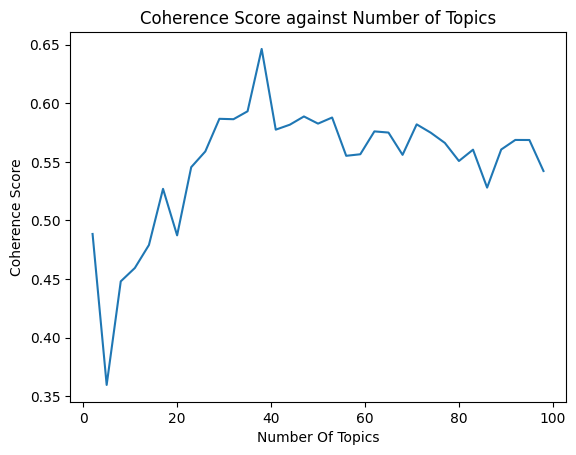

In [89]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number Of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score against Number of Topics")
plt.show()

# The beast coherence score is 0.64, which is at index 12 with number of topics = 38

# Load Best Model

In [91]:
best_lda_model = model_list[12]

In [93]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis  # pyLDAvis is the pyhton library which is used to visualize LDA topics
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(best_lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(vis)

# Obviously there are more than 5 topics that are clearly separable, but there are many topics which are overlapping with one another and it suggests that we should reduce number of topics so that overlapping topics can form single group.

# To further analyze,  we can print most relevet terms from each topic and see why they are overlapping.

In [94]:
best_lda_model.print_topics()

[(5,
  '0.016*"pp" + 0.014*"equation" + 0.010*"cat" + 0.009*"method" + 0.007*"transport" + 0.007*"math" + 0.006*"integral" + 0.006*"transfer" + 0.005*"mathematical" + 0.005*"radiation"'),
 (12,
  '0.009*"time" + 0.009*"vol" + 0.008*"growth" + 0.006*"soft" + 0.005*"de" + 0.004*"tensor" + 0.004*"la" + 0.004*"two" + 0.004*"shape" + 0.004*"crowdy"'),
 (11,
  '0.017*"platform" + 0.015*"gas" + 0.014*"ethereum" + 0.012*"contract" + 0.012*"fee" + 0.010*"currency" + 0.010*"smart" + 0.010*"eth" + 0.009*"value" + 0.009*"user"'),
 (13,
  '0.018*"equation" + 0.008*"boundary" + 0.006*"model" + 0.006*"transport" + 0.006*"problem" + 0.005*"intensity" + 0.005*"energy" + 0.005*"density" + 0.004*"optimization" + 0.004*"strain"'),
 (19,
  '0.043*"mode" + 0.017*"tidal" + 0.015*"equation" + 0.015*"damp" + 0.014*"dissipation" + 0.011*"figure" + 0.010*"rate" + 0.010*"expansion" + 0.010*"rotate" + 0.009*"frequency"'),
 (9,
  '0.014*"multimodal" + 0.012*"model" + 0.010*"learn" + 0.009*"image" + 0.009*"dreamllm"

#  We can dig even futher and assign the respective topic lable to each records and then investigate what is being discussed within records of each topic in detail.

# **BERT Topic Modelling**

# In todays date, BERTTopic modelling is the most populaer topic modelling amgorithms. Unlike LDA which creates topics by just considering the syntactical similarity, BERTopic looks for sementic similarity as well. It uses BERT embedding to calculate embedding for each vector , then uses UMAP to reduce the emebdiing size and perform DBSCAN on top of reduced embedding to cluster them. Eventuallu it applies c-TF-IDF to find most relevent words representing each cluster

# Though it is not always neccesasry to apply lot of cleaning steps with BERTopic modelling, I am still doing some of the cleaning operations such as removing stop words, removing digits and special symbols. I want to keep only the importent keywords representing the topic. 

In [95]:
def clean_text_for_bert_topic_modelling(text):
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"[-]", " ", text)
    text = re.sub(r"[^A-Za-z ]+", "", text)
    text = text.lower()
    doc = nlp(text)
    toekns_without_stop_words = [token.text for token in doc if (token.text not in stop_words and token.text.isalpha() and len(token.text)>1)]
    return " ".join(toekns_without_stop_words)

In [96]:
from bertopic import BERTopic

all_docs = db.get()

preprocessed_text = [clean_text_for_bert_topic_modelling(doc) for doc in all_docs['documents']]

topic_model = BERTopic(embedding_model=model,nr_topics=6)

topics, _ = topic_model.fit_transform(preprocessed_text)
top_words = topic_model.get_topics()

# Below are main topics being discussed

In [115]:
topic_representation = {}
top= 10
for topic_id, words in top_words.items():
    if topic_id != -1:
        topic_representation[topic_id] = "|".join([word[0] for word in words[:top]])
    
topic_representation

{0: 'cid|dx|let|function|equation|order|theorem|boundary|case|growth',
 1: 'learning|al|et|shot|image|data|model|based|training|studies',
 2: 'price|xy|system|vms|services|models|cost|provisioning|demand|utility',
 3: 'quantum|otto|engine|efficiency|time|finite|cycle|heat|phys|disorder',
 4: 'phase|color|metalens|filters|intensity|imaging|spectral|nm|light|fiber'}

# Below i am plotting intertopic distance. if we see topics being saparated very clearly, them this topic modelling approach can be considered to be a good one

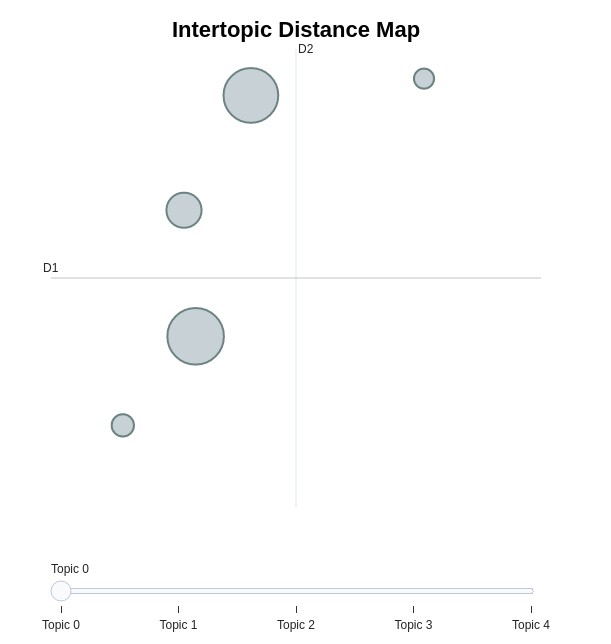

In [2]:
from plotly.io import to_image
from IPython.display import Image

fig = topic_model.visualize_topics(custom_labels=True)
image_bytes = to_image(fig, format='png')
Image(""/kaggle/input/bert-topic"")

# Looking at above plot we can say that 5 is the right numbers of topics. same result we had got with LDA as well

# Below are the most relevet words from each topic according BERTopic

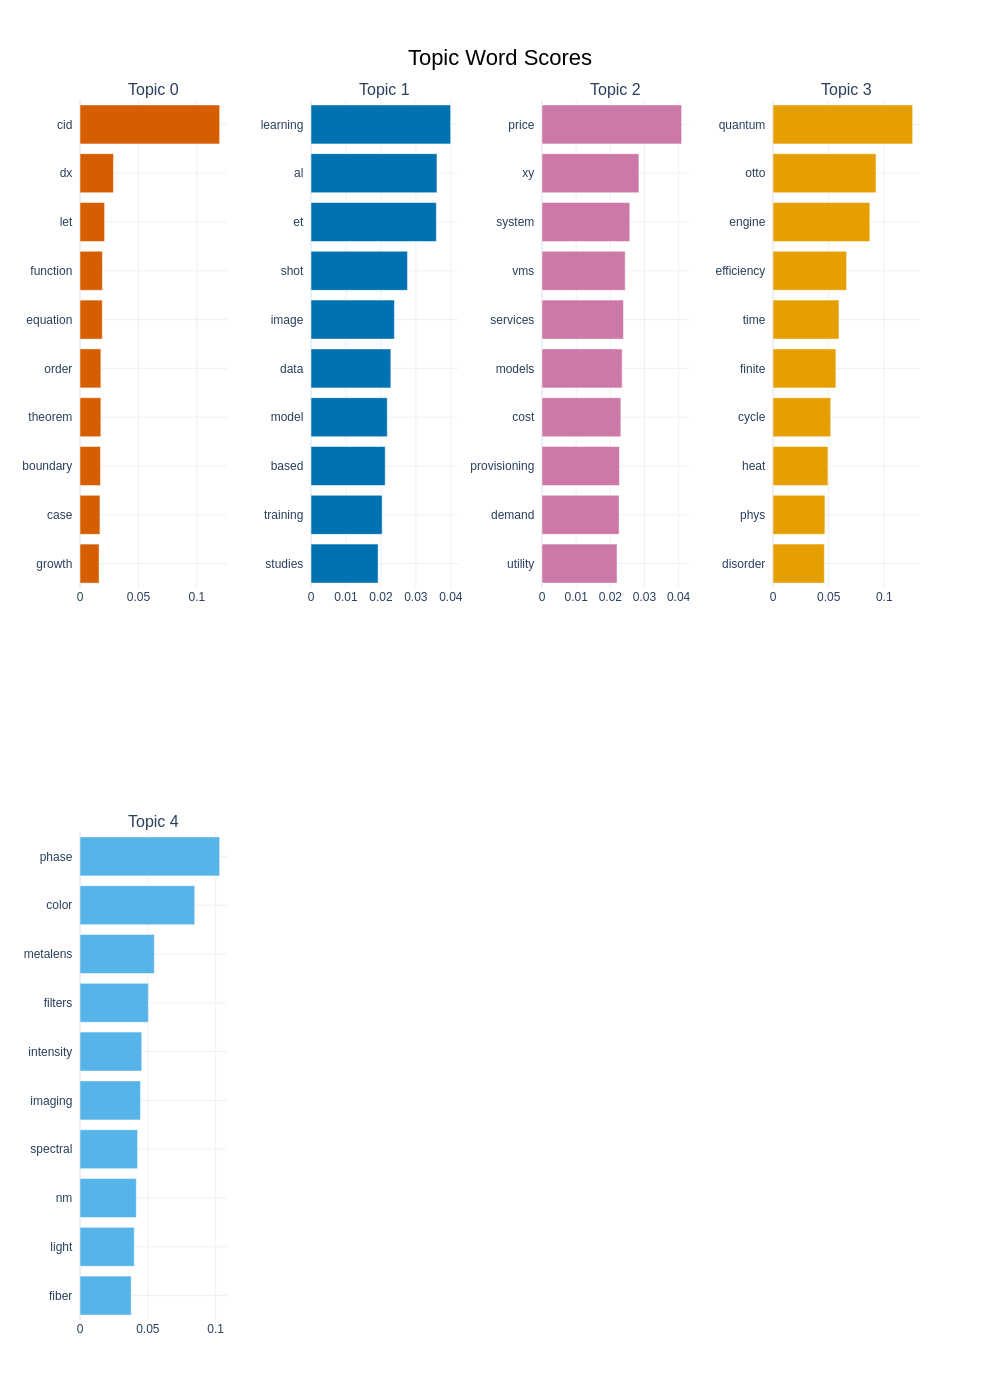

In [107]:
fig = topic_model.visualize_barchart(top_n_topics=10, n_words=10, height=700)
image_bytes = to_image(fig, format='png')
Image(image_bytes)

# By looking at the below plot, you can analyze which all are the topics that are similar to each other. If a cell is dark, then topics mentioned against that cell are highly related. In the diagonal we have a topic's similarity to itself

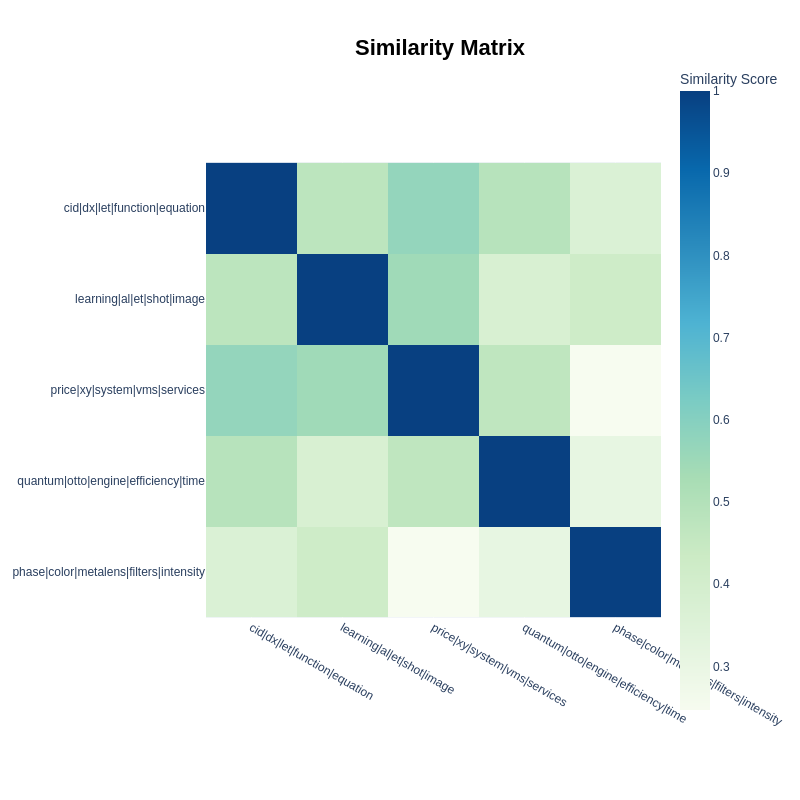

In [116]:
fig = topic_model.visualize_heatmap(n_clusters=4, top_n_topics=10, custom_labels=True, width = 800, height = 800)
image_bytes = to_image(fig, format='png')
Image(image_bytes)

# Above heatmap shows that there there is not much smilarity among topics and they are well saparated

# Below code assign each chunk to its respective topic label according to BERTopic modelling. We can save this file and analyze the pattern in greater detail for further analysis

In [109]:
docs_with_topics = pd.DataFrame({"document":all_docs['documents'], "topic_label":topics})
docs_with_topics

,document,topic_label
0,A LARGE-SCALE DATASET FOR AUDIO-LANGUAGE REPRE...,1
1,mated audio captioning\n\n1. INTRODUCTION\n\nI...,1
2,57K 30K 630K 400K 1.9M\n\n8.8 11.3 7.3 7.8 18....,1
3,"To assess the efficacy of Auto-ACD, we conduct...",1
4,GroundingDINO\n\nBLIP-2\n\nAudioCaption\n\nPAN...,1
...,...,...
1142,"8. A. S. Rana, M. Zubair, M. S. Anwar, M. Sale...",4
1143,"17. Y. Shen, V. Rinnerbauer, I. Wang, V. Stelm...",4
1144,"26. T. Ding, C. Rüttiger, X. Zheng, F. Benz, H...",4
1145,structural transmissive color generation with ...,4


# Below code will print all the records that belong to topic number 1.

In [110]:
docs_with_topics[docs_with_topics['topic_label'] == 1]

,document,topic_label
0,A LARGE-SCALE DATASET FOR AUDIO-LANGUAGE REPRE...,1
1,mated audio captioning\n\n1. INTRODUCTION\n\nI...,1
2,57K 30K 630K 400K 1.9M\n\n8.8 11.3 7.3 7.8 18....,1
3,"To assess the efficacy of Auto-ACD, we conduct...",1
4,GroundingDINO\n\nBLIP-2\n\nAudioCaption\n\nPAN...,1
...,...,...
1074,MIMIC-IV data was collected at Beth Israel Dea...,1
1075,electronic\thealth\trecords\tdatabases.\tThe\t...,1
1076,"12.\n\nYi,\t P.\t H.\t et\t al.\t Radiology\t ...",1
1077,"1934\t(2020).\n\n23.\n\nLiao,\tW.\t&\tVoldman,...",1


# **Conclusion**

* **We have sucessfully downloaded PDFs from arxiv based on our searched terms. We then chunked each pdf and stored the chunked data along with its embeddings in Chroma DB vectorstore**
* **We then tried multiple queries and explored various ways of getting most relevent chunk to our requirement**
* **Eventually we performed topic modelling with two approaches LDA and BERTopic, and both were able to detect 5 distinct topics.**

# **References**
# Most of the topic modelling code is inspired by my earlier work. My work is open and stored in my Github repo. My giHub profile is [10deepaktripathi](https://github.com/10deepaktripathi)
1. [BertTopic--> https://github.com/10deepaktripathi/Predict_Disaster_Using_LLM_Roberta_and_cTF_IDF](https://github.com/10deepaktripathi/Predict_Disaster_Using_LLM_Roberta_and_cTF_IDF)
2. [LDA--> https://github.com/10deepaktripathi/Information-Retrieval-From_Food-Journals_Using_BERT_and_Spacy/blob/main/Information%20Retrieval%20From%20Food%20Journals.ipynb](https://github.com/10deepaktripathi/Information-Retrieval-From_Food-Journals_Using_BERT_and_Spacy/blob/main/Information%20Retrieval%20From%20Food%20Journals.ipynb)
